# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [2]:
!pip install nibabel

   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   --------------- ------------------------ 1.3/3.3 MB 7.5 MB/s eta 0:00:01
   -------------------------------------- - 3.1/3.3 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 8.1 MB/s eta 0:00:00


In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [16]:
file_path = r"C:\Users\Admin\Downloads\CT_AVM.nii.gz"


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [17]:

mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (256, 242, 154)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(-0.5, 241.5, 255.5, -0.5)

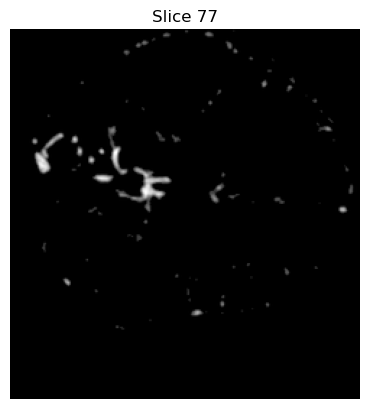

In [18]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [19]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

154

## Normalize a Slice
Normalization improves contrast.

(-0.5, 241.5, 255.5, -0.5)

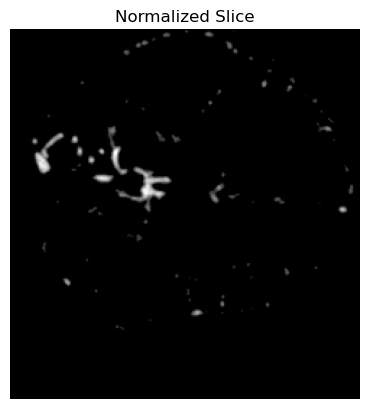

In [20]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(-0.5, 127.5, 127.5, -0.5)

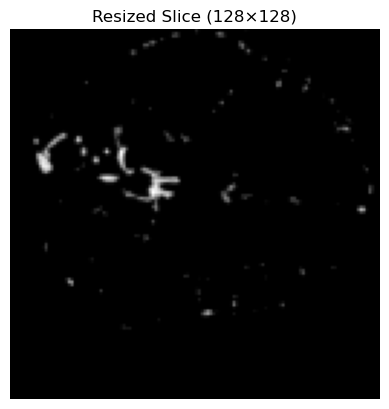

In [21]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


In [23]:
file_path = r"C:\Users\Admin\Downloads\flair.nii.gz"
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (240, 240, 155)


In [24]:
def plot_slices(volume, indices):
    fig, axes = plt.subplots(1, len(indices), figsize=(15, 5))
    for ax, idx in zip(axes, indices):
        ax.imshow(volume[:, :, idx], cmap='gray')
        ax.set_title(f'Slice {idx}')
        ax.axis('off')
    plt.show()

In [28]:
def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)
    normalized = (volume - min_val) / (max_val - min_val)
    return normalized

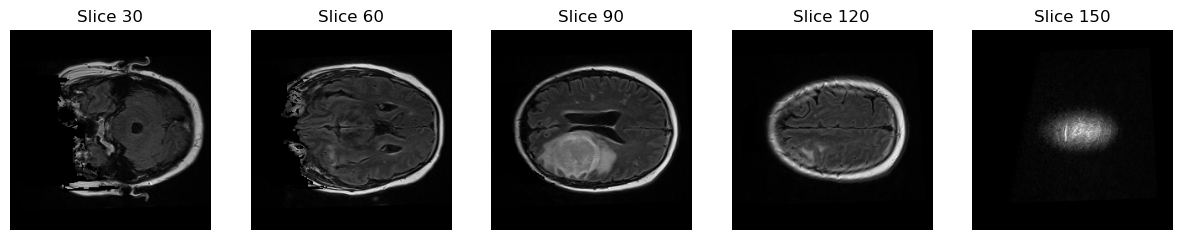

In [26]:
# Visualize selected slice number
slice_indices = [30, 60, 90, 120, 150]
plot_slices(mri, slice_indices)

Normalized MRI Shape: (240, 240, 155)


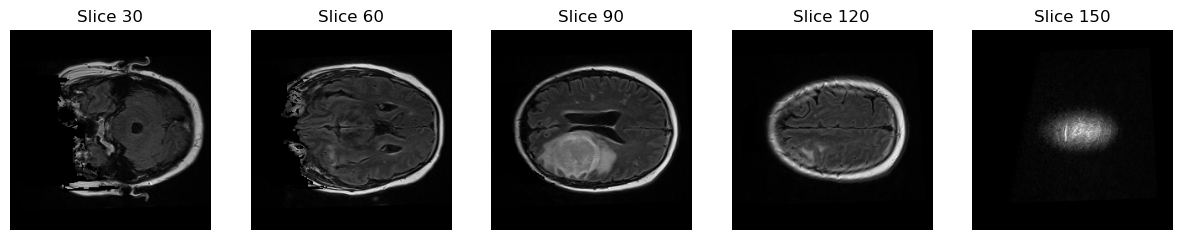

In [29]:
# normalization of all the slices
mri_normalized = normalize_volume(mri)
print('Normalized MRI Shape:', mri_normalized.shape)
plot_slices(mri_normalized, slice_indices)
